# Supervised Segmentation

### Data

In [5]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [6]:
import pandas as pd

# Assuming the CSV file is in the same folder as your Jupyter Notebook
file_path = "water_potability.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.shape

(3276, 10)

In [8]:
# Check for missing values in each column
missing_values = df.isna().sum()

print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [9]:
# Impute missing values with mode

df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mode().mean())

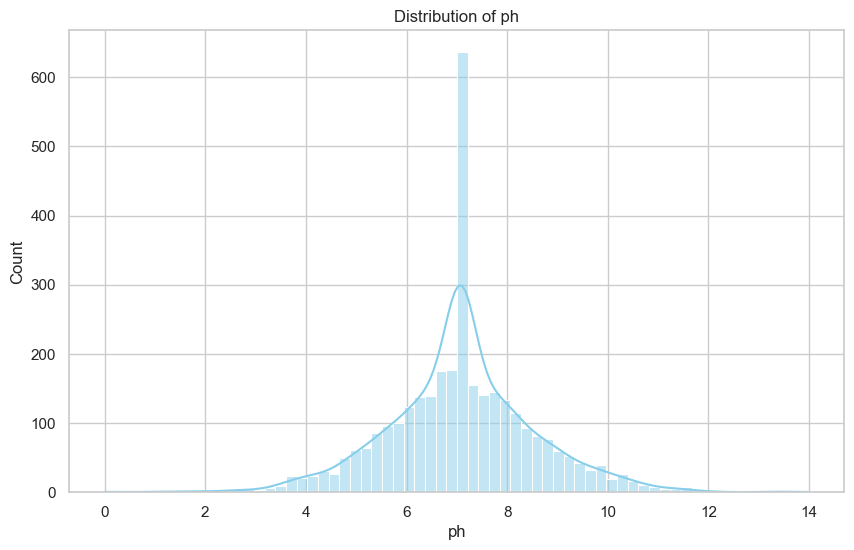

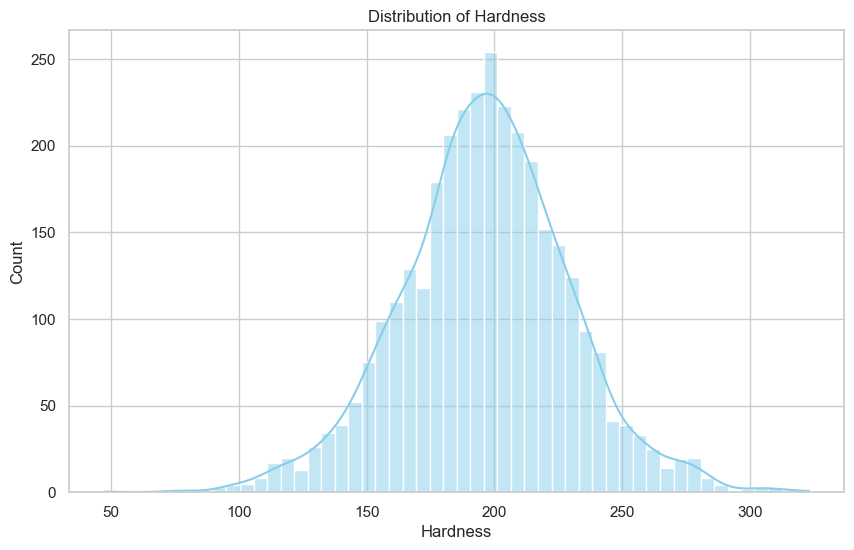

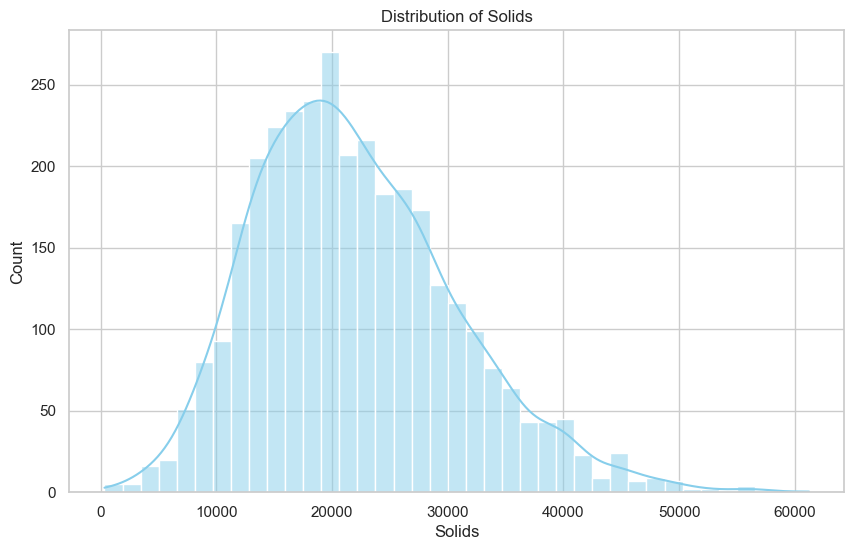

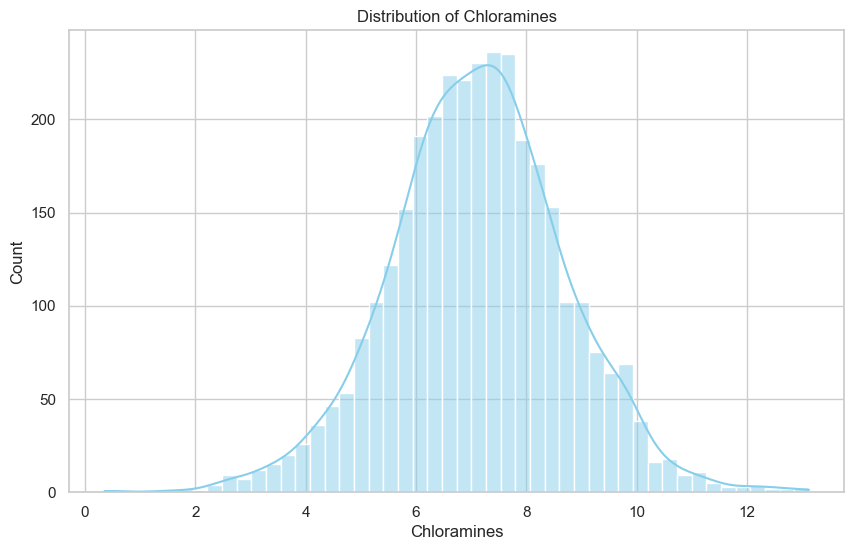

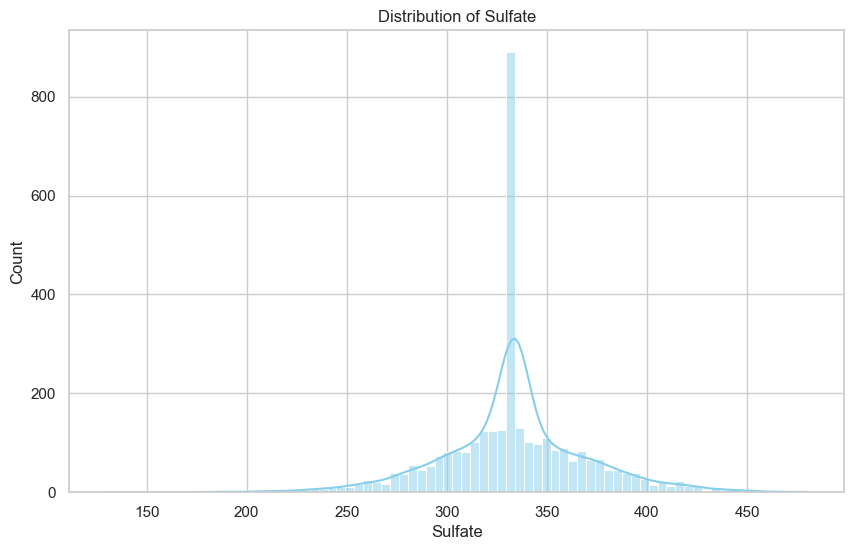

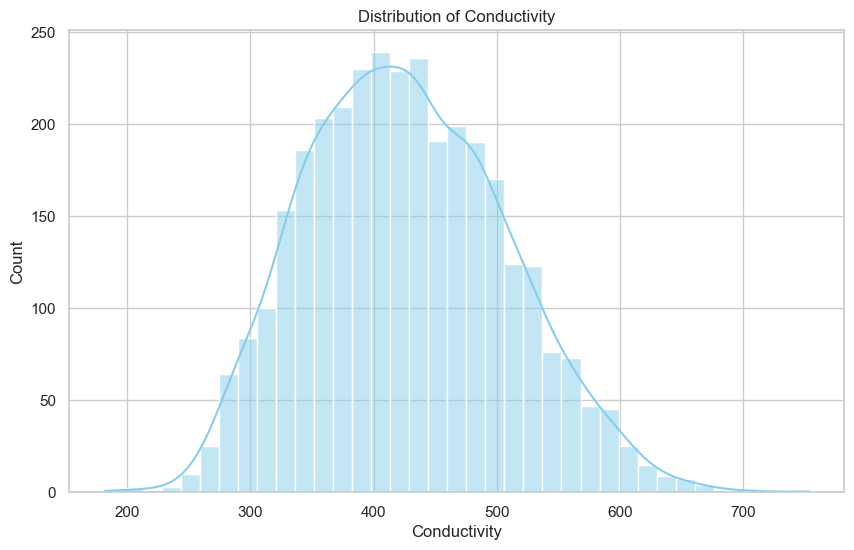

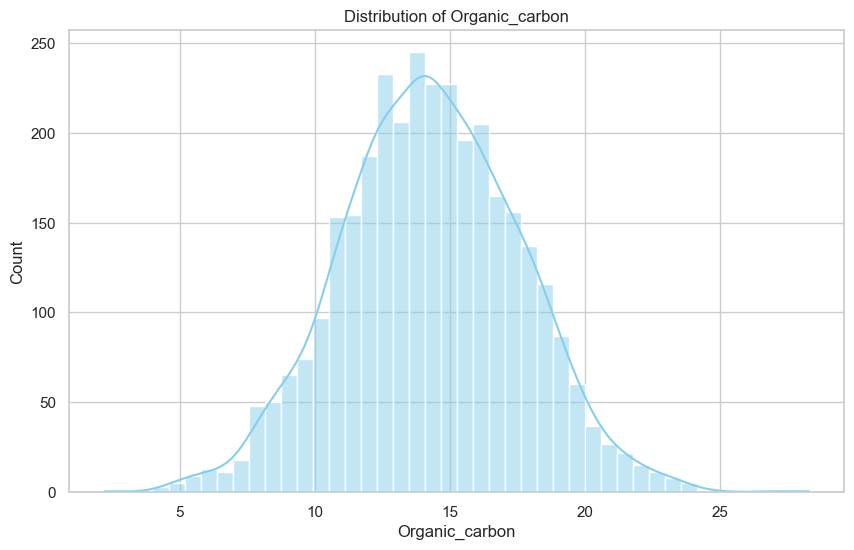

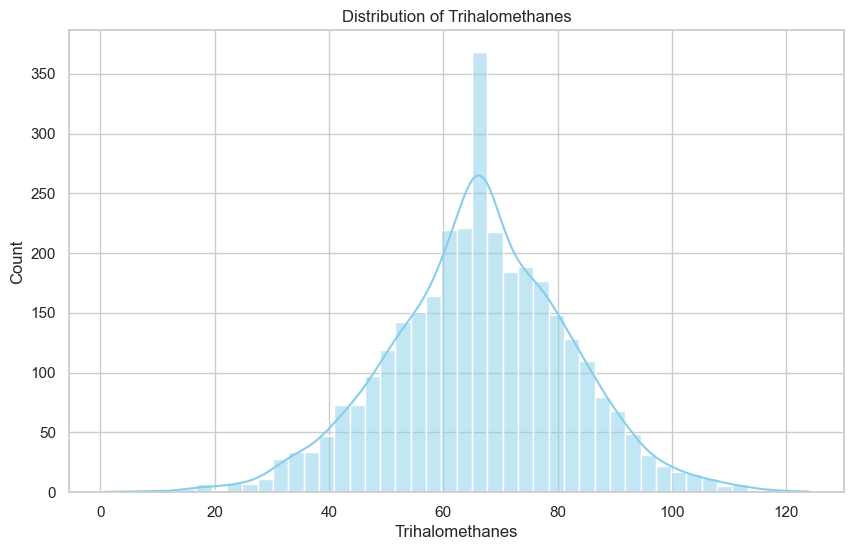

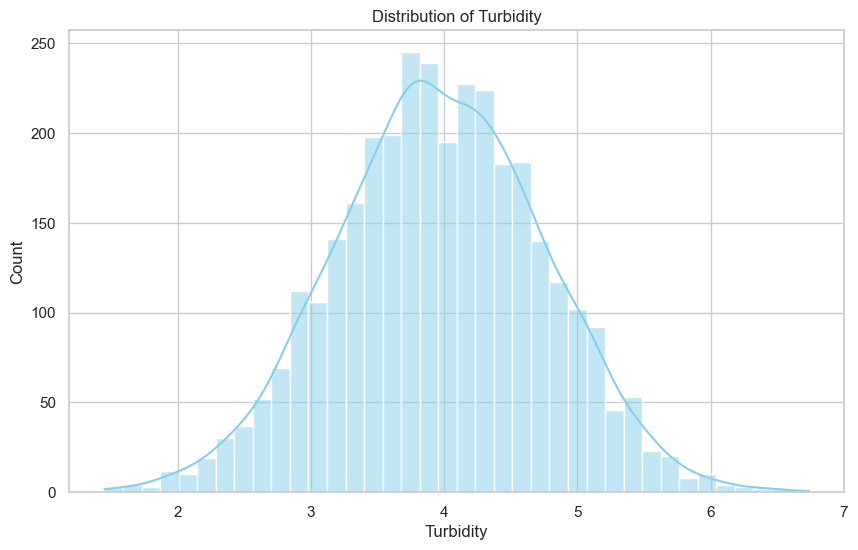

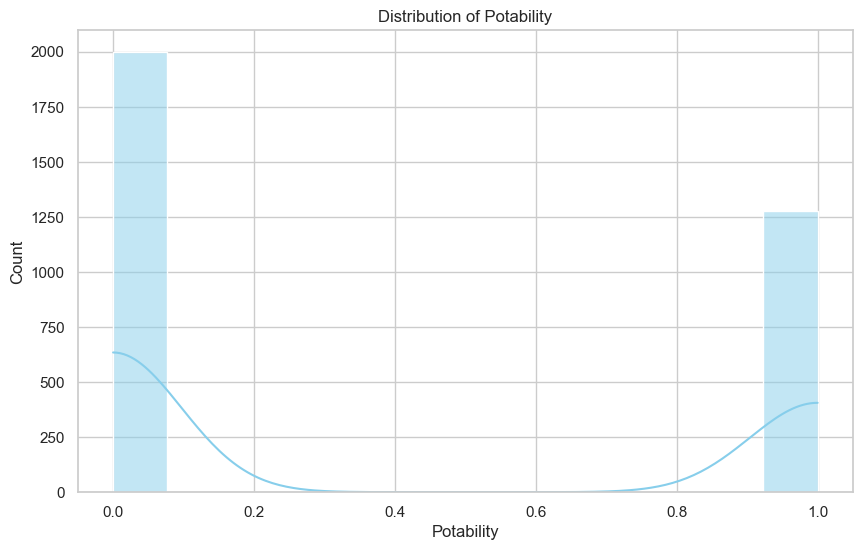

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Iterate through each column and plot the distribution
for col in df.columns:
    plt.figure(figsize=(10, 6))
    
    if df[col].dtype == 'object':
        # Categorical column, create a countplot
        sns.countplot(x=col, data=df, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    else:
        # Numerical column, create a histogram
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
    
    plt.show()


### Model

In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming "Potability" is the target variable
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire feature set and transform it
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.6036585365853658
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       400
           1       0.49      0.45      0.47       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters you want to tune
param_grid = {
    'criterion': ['gini', 'entropy'],  # Test both Gini and entropy
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the scaled data
grid_search.fit(X_train, y_train)

# Get the best estimator and parameters from the grid search
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Perform cross-validated evaluation on the best estimator
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5)

# Print the results
print(f"Best Parameters: {best_params}")
print(f"Cross-validated Accuracy: {cv_scores.mean()} (±{cv_scores.std()})")

# Now, you can use the best classifier for predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-validated Accuracy: 0.6370229007633588 (±0.015428536588860859)
Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.85      0.74       400
           1       0.54      0.27      0.36       256

    accuracy                           0.62       656
   macro avg       0.59      0.56      0.55       656
weighted avg       0.60      0.62      0.59       656



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their respective search spaces
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),  # Random integer values between 1 and 20
    'min_samples_split': randint(2, 20),  # Random integer values between 2 and 20
    'min_samples_leaf': randint(1, 10)  # Random integer values between 1 and 10
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Fit the random search on the scaled data
random_search.fit(X_train, y_train)

# Get the best estimator and parameters from the random search
best_clf = random_search.best_estimator_
best_params = random_search.best_params_

# Now, you can use the best classifier for predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.6448170731707317
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       400
           1       0.61      0.25      0.35       256

    accuracy                           0.64       656
   macro avg       0.63      0.57      0.55       656
weighted avg       0.64      0.64      0.60       656



##### Visualize Decision Tree

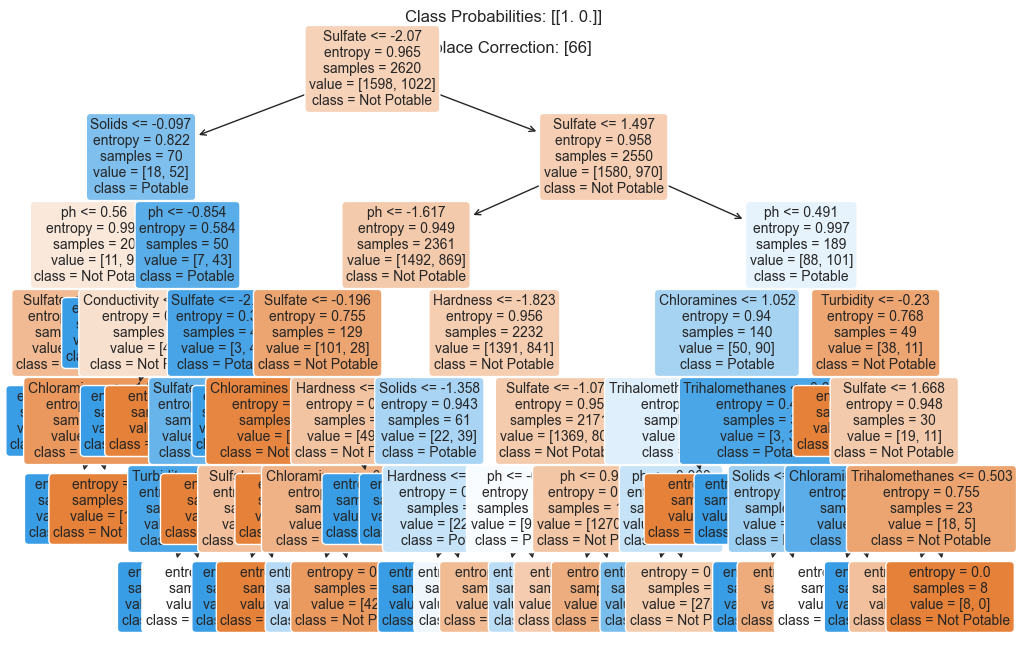

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming "best_clf" is your trained Decision Tree Classifier
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True, fontsize=10)

# Display class probabilities and Laplace correction
plt.text(0.5, 1.0, f'Class Probabilities: {best_clf.predict_proba([X.iloc[0]])}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'Laplace Correction: {best_clf.apply([X.iloc[0]])}', ha='center', va='bottom', transform=plt.gca().transAxes)

plt.show()


In [11]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [12]:
# Visualize

from sklearn.tree import export_graphviz
import graphviz

# Assuming "best_clf" is your trained Decision Tree Classifier
dot_data = export_graphviz(best_clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Potable', 'Potable'],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree', view=True)

graph.format = 'png'  # You can change 'png' to other formats like 'pdf', 'svg', etc.
graph.render('decision_tree', view=True)


'decision_tree.png'

In [18]:
from sklearn.tree import export_text

def get_class_prob_laplace(node_samples):
    class_probabilities = node_samples.sum(axis=0) / node_samples.sum()
    laplace_correction = (node_samples.sum(axis=0) + 1) / (node_samples.sum() + len(class_probabilities))
    return class_probabilities, laplace_correction

# Assuming "best_clf" is your trained Decision Tree Classifier
tree_rules = export_text(best_clf, feature_names=X.columns.tolist(), show_weights=True)

# Extract the node IDs
node_ids = [rule.split()[1] for rule in tree_rules.split('\n') if 'samples' in rule]

# Annotate the nodes with class probabilities and Laplace correction
annotations = []

for node_id in node_ids:
    node_samples = best_clf.apply(X) == int(node_id)
    class_probabilities, laplace_correction = get_class_prob_laplace(node_samples)
    annotations.append(f'Node {node_id}\nClass Probabilities: {class_probabilities}\nLaplace Correction: {laplace_correction}')

# Generate the tree plot with annotations
dot_data = export_graphviz(best_clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Potable', 'Potable'],  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)

for node_id, annotation in zip(node_ids, annotations):
    graph.node(node_id, label=f'{node_id}\n{annotation}')

# Render and view the tree
graph.render('decision_tree', view=True)


### Other Approaches to Modelling

##### Algorithm for Hyperparameter Tuning

In [13]:
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [14]:
import optuna

# Define the objective function to minimize (negative accuracy)
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    clf = DecisionTreeClassifier(
        random_state=42,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    return -cv_scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Get the best parameters from the study
best_params = study.best_params

# Initialize the classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)

# Fit the best classifier on the training data
best_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


[I 2023-09-08 14:23:38,341] A new study created in memory with name: no-name-33fc4996-872f-4023-b55e-e3c392c0c9f5


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-08 14:23:38,784] Trial 0 finished with value: -0.6038167938931297 and parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 6}. Best is trial 0 with value: -0.6038167938931297.
[I 2023-09-08 14:23:39,109] Trial 1 finished with value: -0.6217557251908397 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.6038167938931297.
[I 2023-09-08 14:23:39,357] Trial 2 finished with value: -0.6049618320610687 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.6038167938931297.
[I 2023-09-08 14:23:39,654] Trial 3 finished with value: -0.5992366412213741 and parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 3 with value: -0.5992366412213741.
[I 2023-09-08 14:23:39,943] Trial 4 finished with value: -0.603816793

##### Lazypredict to test other Models

In [15]:
!pip install lazypredict


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Found existing installation: lightgbm 4.0.0
Uninstalling lightgbm-4.0.0:
  Would remove:
    /Users/larsbecker/Library/Python/3.9/lib/python/site-packages/lightgbm-4.0.0.dist-info/*
    /Users/larsbecker/Library/Python/3.9/lib/python/site-packages/lightgbm/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 16.0.6, run:
  brew reinstall libomp
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming "Potability" is the target variable
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']  # Target variable

# Initialize LazyClassifier
clf = LazyClassifier(predictions=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit LazyClassifier
models = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance metrics
print(models)


100%|██████████| 29/29 [00:09<00:00,  3.05it/s]

[LightGBM] [Info] Number of positive: 1022, number of negative: 1598
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390076 -> initscore=-0.446991
[LightGBM] [Info] Start training from score -0.446991
(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
LGBMClassifier                     0.65               0.60     0.60      0.63  \
ExtraTreesClassifier               0.67               0.60     0.60      0.63   
XGBClassifier                      0.64               0.60     0.60      0.63   
SVC                                0.67               0.60     0.60      0.62   
RandomForestClassifi